## World Ocean Atlas 2018 Horizontal Grids

Grids below are compatible with xESMF and include a land-sea binary mask

In [1]:
import xarray as xr

#### WOA18 0.25-degree

In [2]:
ds = xr.open_dataset("woa18_decav_t00_04.nc", decode_times=False)
ds

<xarray.Dataset>
Dimensions:             (lat: 720, nbounds: 2, lon: 1440, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 4.326e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa                (time, depth, lat, lon) float32 ...
    t_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29

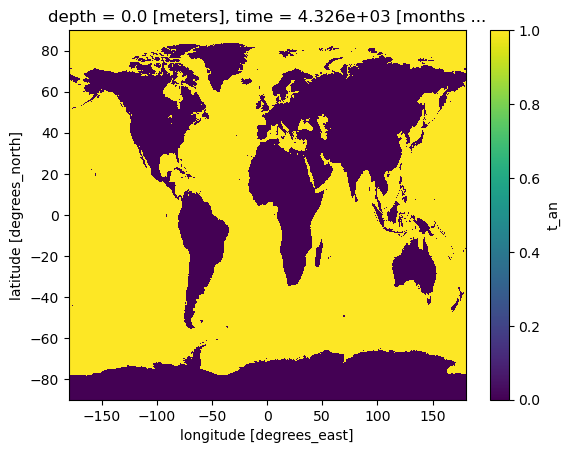

In [3]:
wet = xr.where(ds.t_an[0,0].isnull(),0,1).astype("i1")
wet.plot()

In [4]:
lat_b = sorted(list(set(ds.lat_bnds.values.flatten())))
lat_b = xr.DataArray(lat_b, dims=("lat_b"), coords={"lat_b":lat_b}, name="lat_b", attrs=ds.lat_bnds.attrs)

lon_b = sorted(list(set(ds.lon_bnds.values.flatten())))
lon_b = xr.DataArray(lon_b, dims=("lon_b"), coords={"lon_b":lon_b}, name="lon_b", attrs=ds.lon_bnds.attrs)

In [5]:
dsout = xr.Dataset()
dsout["lat"] = ds.lat
dsout["lon"] = ds.lon
dsout["lat_b"] = lat_b
dsout["lon_b"] = lon_b
dsout["nbounds"] = ds.nbounds.astype("i1")

dsout["mask"] = xr.DataArray(wet,dims=("lat","lon"))

# xesmf compatible
dsout.lat.attrs["bounds"] = "lat_b"
dsout.lon.attrs["bounds"] = "lon_b"

dsout.mask.attrs = {
    "standard_name": "sea_binary_mask",
    "long_name": "Sea Binary Mask 1 = sea, 0 = land",
    "units": "1"
}

dsout = dsout.reset_coords(drop=True)

dsout.attrs = {
    "title": "World Ocean Atlas 2018 0.25-deg Horizontal Grid"
}

dsout

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, lat_b: 721, lon_b: 1441, nbounds: 2)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat_b    (lat_b) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon_b    (lon_b) float32 -180.0 -179.8 -179.5 -179.2 ... 179.5 179.8 180.0
  * nbounds  (nbounds) int8 0 1
Data variables:
    mask     (lat, lon) int8 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    title:    World Ocean Atlas 2018 0.25-deg Horizontal Grid

In [6]:
dsout.to_netcdf("WOA18_025deg_horiz_grid.nc")

#### WOA18 1-degree

In [7]:
ds = xr.open_dataset("woa18_decav_t00_01.nc", decode_times=False)
ds

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 4.326e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa                (time, depth, lat, lon) float32 ...
    t_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

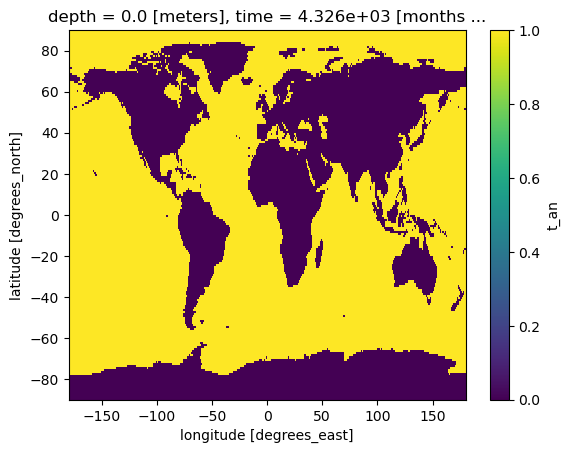

In [8]:
wet = xr.where(ds.t_an[0,0].isnull(),0,1).astype("i1")
wet.plot()

In [9]:
lat_b = sorted(list(set(ds.lat_bnds.values.flatten())))
lat_b = xr.DataArray(lat_b, dims=("lat_b"), coords={"lat_b":lat_b}, name="lat_b", attrs=ds.lat_bnds.attrs)

lon_b = sorted(list(set(ds.lon_bnds.values.flatten())))
lon_b = xr.DataArray(lon_b, dims=("lon_b"), coords={"lon_b":lon_b}, name="lon_b", attrs=ds.lon_bnds.attrs)

In [10]:
dsout = xr.Dataset()
dsout["lat"] = ds.lat
dsout["lon"] = ds.lon
dsout["lat_b"] = lat_b
dsout["lon_b"] = lon_b
dsout["nbounds"] = ds.nbounds.astype("i1")

dsout["mask"] = xr.DataArray(wet,dims=("lat","lon"))

# xesmf compatible
dsout.lat.attrs["bounds"] = "lat_b"
dsout.lon.attrs["bounds"] = "lon_b"

dsout.mask.attrs = {
    "standard_name": "sea_binary_mask",
    "long_name": "Sea Binary Mask 1 = sea, 0 = land",
    "units": "1"
}

dsout = dsout.reset_coords(drop=True)

dsout.attrs = {
    "title": "World Ocean Atlas 2018 1-deg Horizontal Grid"
}

dsout

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, lat_b: 181, lon_b: 361, nbounds: 2)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat_b    (lat_b) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lon_b    (lon_b) float32 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * nbounds  (nbounds) int8 0 1
Data variables:
    mask     (lat, lon) int8 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    title:    World Ocean Atlas 2018 1-deg Horizontal Grid

In [11]:
dsout.to_netcdf("WOA18_1deg_horiz_grid.nc")